# Team 3 Final EDA Notebook 1 (Kahsai, Nichols, Pellerito)
An Exploration of the Application_Train Dataset

# Review Training Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import gc

In [2]:
# Read in training data
train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
pd.options.display.max_columns = None

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Find distribution of target variable
(train['TARGET'].value_counts() / len(train)).to_frame()

,TARGET
0,0.919271
1,0.080729


This dataset is not evenly distributed among those who default and those who did not default on thier loan. 

TARGET == 0 --> Individuals who paid their loan

TARGET == 1 --> Individuals who defaulted on their loan

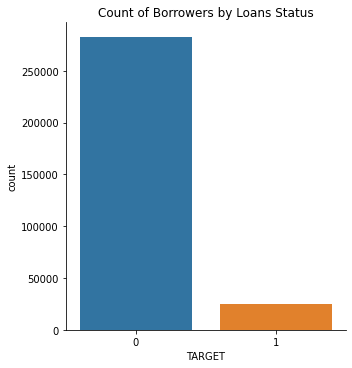

In [4]:
# Distribution of target
sns.catplot(data= train, x = 'TARGET', kind='count')
plt.title('Count of Borrowers by Loans Status')
plt.show()

The dataset is not evenly distributed along the target variable.

# Demographic Exploration

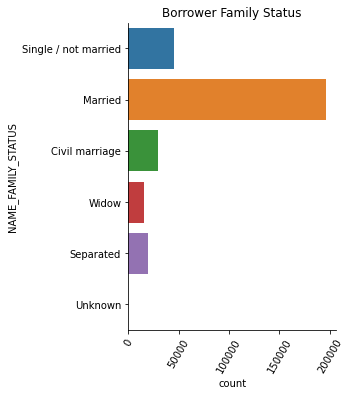

In [5]:
# Distribution of lenders by family status
sns.catplot(data = train, y = 'NAME_FAMILY_STATUS',kind = 'count')
plt.xticks(rotation = 60)
plt.title('Borrower Family Status')
plt.show()

The majority of borrowers are married or single.

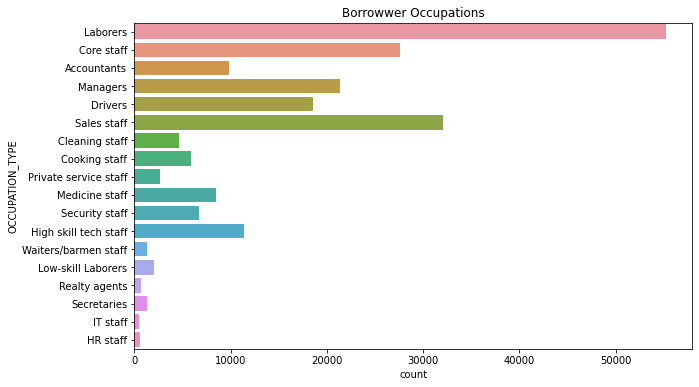

In [6]:
plt.subplots(figsize =(10, 6))
sns.countplot(data = train, y = 'OCCUPATION_TYPE')
plt.title('Borrowwer Occupations')
plt.show()

Laborers and Sales Staff make up the most frequent type of borrower.

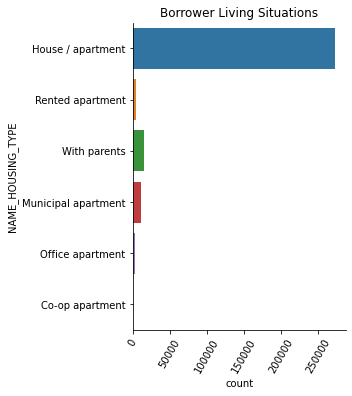

In [7]:
sns.catplot(data= train, y = 'NAME_HOUSING_TYPE', kind='count')
plt.xticks(rotation = 60)
plt.title('Borrower Living Situations')
plt.show()

Most borrowers live in a house or apartment.

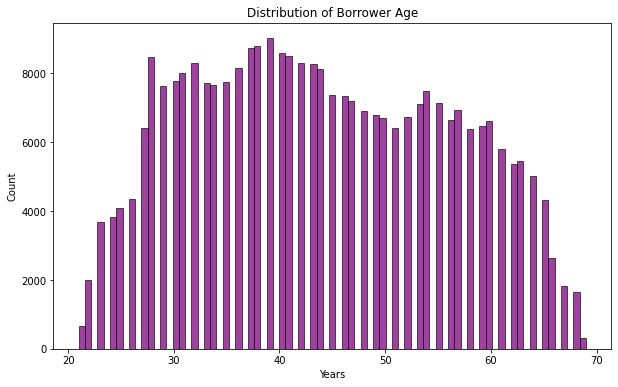

In [8]:
# Age distribution
X = round(abs(train['DAYS_BIRTH'] / (365)))
plt.subplots(figsize =(10, 6))
sns.histplot(data= train, x = X, color = 'purple')
plt.title('Distribution of Borrower Age')
plt.xlabel('Years')
plt.show()

Borrowers range in age from approximately 20 years old to 68 years old.

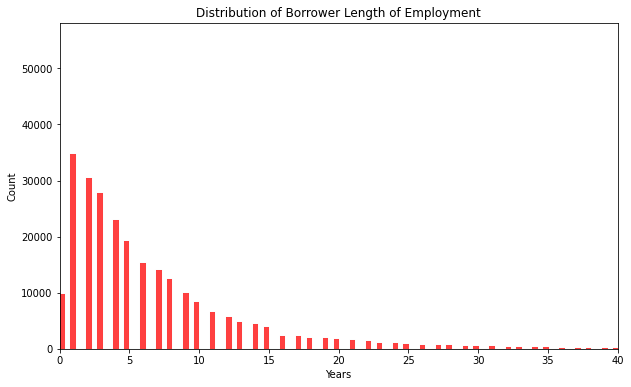

In [9]:
# Employment distribution
X = round(abs(train['DAYS_EMPLOYED'] / (365)))
plt.subplots(figsize =(10, 6))
sns.histplot(data= train, x = X, color = 'red')
plt.title('Distribution of Borrower Length of Employment')
plt.xlabel('Years')
plt.xlim(0, 40)
plt.show()

The majority of borrowers less than 15 years of employment experience.

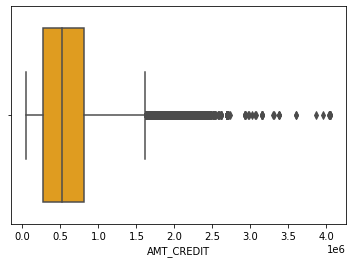

In [10]:
# Credit distribution
sns.boxplot(data = train, x = 'AMT_CREDIT', color = 'orange')
plt.show()

Although there are borrowers with credit up to 4 Million, approximately three-quarters of borrowers have less than 1 Million in credit.

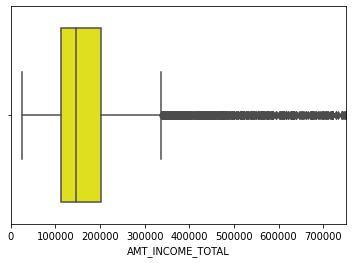

In [11]:
# Income distribution
sns.boxplot(data = train, x = 'AMT_INCOME_TOTAL', color = 'yellow')
plt.xlim(0, 750000)
plt.show()

Although some income levels are as high as 1 Million, approximately three-quarters of borrowers earn less than 200,000.

# Feature Correlation

In [12]:
# Build correlation table of edited features 
# Show only those higher than 0.75
feat_corr = pd.DataFrame(train).corr()
corr_df = feat_corr.where(np.triu(np.ones(feat_corr.shape), k = 1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df['Correlation'] = abs(corr_df['Correlation'])
matrix = corr_df.sort_values(by = 'Correlation', ascending = False)
max_corr = matrix[matrix['Correlation'] > 0.75]
max_corr

,Feature A,Feature B,Correlation
7569,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.00
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.00
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00
...,...,...,...
7471,LIVINGAPARTMENTS_MEDI,ELEVATORS_MODE,0.80
5973,LIVINGAPARTMENTS_MODE,ELEVATORS_AVG,0.80
5448,ELEVATORS_MODE,LIVINGAPARTMENTS_AVG,0.79
641,AMT_GOODS_PRICE,AMT_ANNUITY,0.78


As mean, median and mode apartment measurements are highly correlated, we will remove two of the three sets of features. We will also remocve OBS_30, OBS_60, DEF_30, DEF_60, and CNT_FAM_MEMBERS to eliminate additional redundancies in the data.

In [13]:
dels2 = ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
         'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
         'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
         'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',  'NONLIVINGAREA_MODE', 
         'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',  
         'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
         'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
         'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',  
         'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
         'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
         'OBS_60_CNT_SOCIAL_CIRCLE',  'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
         'ORGANIZATION_TYPE']


train = train.drop(train[dels2], axis = 1)

In [14]:
# Create correlation variable
corr1 = train.corr()['TARGET'].sort_values()

# Strongest negative correlation
print('Features with Strongest Negative Correlation:')
corr1.head()

Features with Strongest Negative Correlation:


EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64

In [15]:
# Strongest positive correlation
print('Features with Strongest Positive Correlation:')
corr1.tail()

Features with Strongest Positive Correlation:


DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

This provides a good starting point for determining feature importance. All three EXT_SOURCE features have the significantly higher correlation (2-3 times) than other features so we will be sure to consider these when constructing our model. Let's examine the features with correlation > 0.05.

In [16]:
top_corr = train[['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 
                  'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE' ]]

top_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   EXT_SOURCE_1                 134133 non-null  float64
 2   EXT_SOURCE_2                 306851 non-null  float64
 3   EXT_SOURCE_3                 246546 non-null  float64
 4   DAYS_BIRTH                   307511 non-null  int64  
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 6   REGION_RATING_CLIENT         307511 non-null  int64  
 7   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 18.8 MB


In [17]:
top_corr.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE
0,1,0.083037,0.262949,0.139376,-9461,2,2,-1134.0
1,0,0.311267,0.622246,NaN,-16765,1,1,-828.0
2,0,NaN,0.555912,0.729567,-19046,2,2,-815.0
3,0,NaN,0.650442,NaN,-19005,2,2,-617.0
4,0,NaN,0.322738,NaN,-19932,2,2,-1106.0


EXT_SOURCE_1 and EXT_SOURCE_3 have a large number of missing values. We believe the three external sources are the credit bureaus and therefore these variables collectively build a borrowers credit score. To address the missing data, we will find the mean of any exisitng values among these three columns and fill null values with that mean. DAYS_BIRTH and DAYS_LAST_PHONE_CHANGE are presented with negative numbers so we will convert them to positive years to make them easier to comprehend. 

In [18]:
train.info(max_cols = 85)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Find and Fix Additional Missing Data

Because of the importance of the three external sources and the high number missing values, we will create a feature using the mean of existing values of each row. Should no values exist, we will fill them with 0.2.

In [19]:
# Create avg of each row of EXIT_SOURCE values to fill in missing values
train['AVG_EXT'] = train.iloc[:, 39:42].sum(axis=1)/(3- train.iloc[:,39:42].isnull().sum(axis=1))
train['AVG_EXT'].replace(np.nan, 0.2, inplace = True)   

# Fill in missing values
train.EXT_SOURCE_1.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_2.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_3.fillna(train.AVG_EXT, inplace=True)
                   
gc.collect()

160162

In [20]:
# Create function to find count of missing values by column
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1 , keys = ['Total', 'Percent'])

missing_data(train).head(20)


,Total,Percent
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_AVG,208642,67.848630
YEARS_BUILD_AVG,204488,66.497784
OWN_CAR_AGE,202929,65.990810
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
NONLIVINGAREA_AVG,169682,55.179164
ELEVATORS_AVG,163891,53.295980


The number of missing values in this dataset is significant. To remedy this, we chose to drop additional features based on two factors: 1) their correlation values, and 2) the number of missing values.


In [21]:
# Find columns with missing values
missing_prcnt = train.isnull().sum()/train.shape[0] * 100

# Find columns with more than 50% missing
high_missing = missing_prcnt[missing_prcnt > 50]
high_missing_index = high_missing.index.tolist()

# Correlate the highest missing columns
corr_missing = corr1.reindex(high_missing_index).sort_values()

# Define columns to drop - greater than 0.035, or less than -0.035
missing_cols_to_drop = corr_missing.index.difference(corr_missing[(corr_missing > 0.035) | (corr_missing < -0.035)].index).tolist()

print(missing_cols_to_drop)
len(missing_cols_to_drop)

['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_AVG']


12

In [22]:
# Drop identified columns fromt he training dataset
train = train.drop(train[missing_cols_to_drop], axis = 1)
train.shape

(307511, 72)

In [23]:
gc.collect()

84

# Additional Feature Exploration

Improve visualizations with adjustments to a few features

In [24]:
# Convert DAYS_BIRTH to years
train['AGE'] = round(abs(train['DAYS_BIRTH'] / (365)))

# Convert DAYS_LAST_PHONE_CHANGE to years
train['PHONE_CHANGE_YEARS'] = round(abs(train['DAYS_LAST_PHONE_CHANGE'] / (365)))

# Convert DAYS_EMPLOYED to years
train['YEARS_EMPLOYED'] = round(abs(train['DAYS_EMPLOYED'] / (365)))

# Remove unneeded columns
train = train.drop(['AVG_EXT', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED'], axis = 1)

After creating a subset of the data, we will review a sampling of features that have been identified as significant thus far.

In [25]:
# Select sample of dataset for visualizations
train30k = train.sample(frac = 0.10, replace = False, random_state = 1)

In [26]:
# Build function for boxplots 
def class_box(feature):
    plt.subplots(figsize=(10, 6))
    sns.boxplot(data = train30k, x = train30k[feature], y = train30k.TARGET, orient = "h")
    plt.title(f'Boxplot for {feature} by Class')
    plt.show()

In [27]:
# Build function for histograms
def class_hist(feature):
    plt.subplots(figsize=(10, 6))
    sns.histplot(data = train30k, x = train30k[feature], color = 'green')
    plt.title(f'Distribution of {feature} among Borrowers')
    plt.show()

### EXT_SOURCE_1

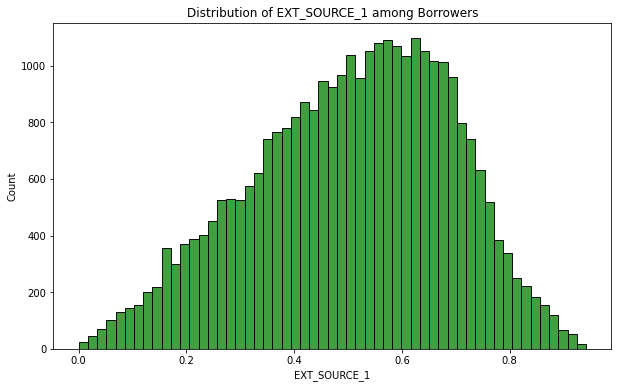

In [28]:
class_hist('EXT_SOURCE_1')

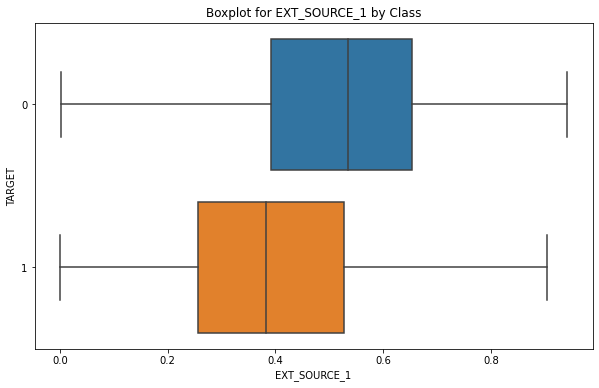

In [29]:
class_box('EXT_SOURCE_1')

#### EXT_SOURCE_2

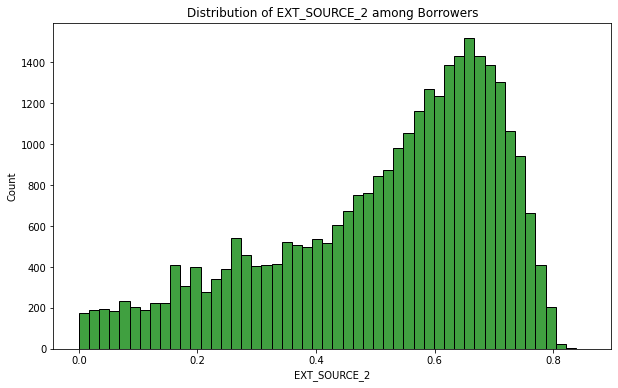

In [30]:
class_hist('EXT_SOURCE_2')

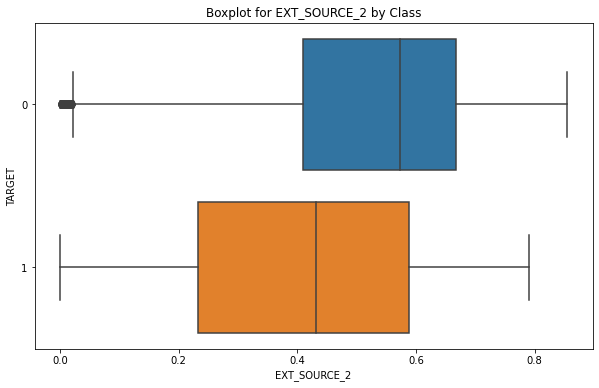

In [31]:
# Spread of TARGET on EXT_SOURCE_2
class_box('EXT_SOURCE_2')

#### EXT_SOURCE_3

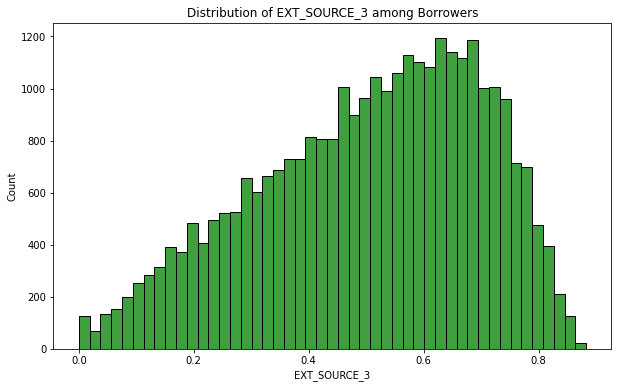

In [32]:
class_hist('EXT_SOURCE_3')

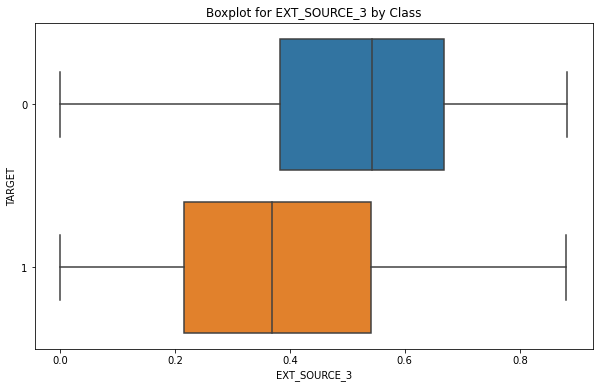

In [33]:
class_box('EXT_SOURCE_3')

From these vizualizations, we glean that borrowers with higher scores from all three external sources were more likely to repay their loans.

#### AGE

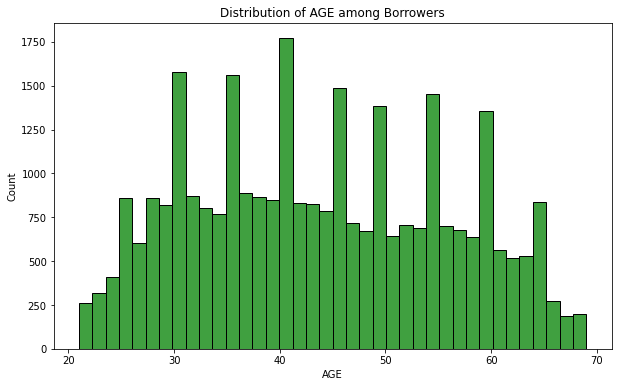

In [34]:
class_hist('AGE')

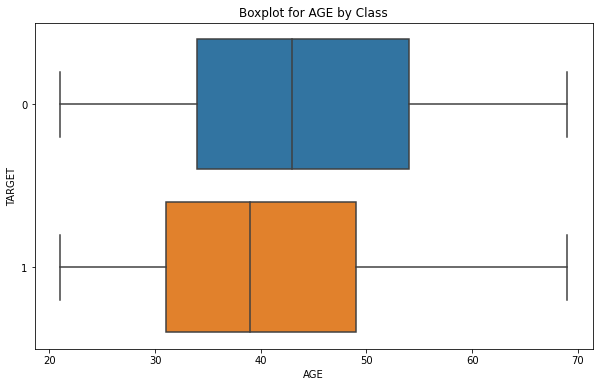

In [35]:
class_box('AGE')

#### PHONE_CHANGE_YEARS

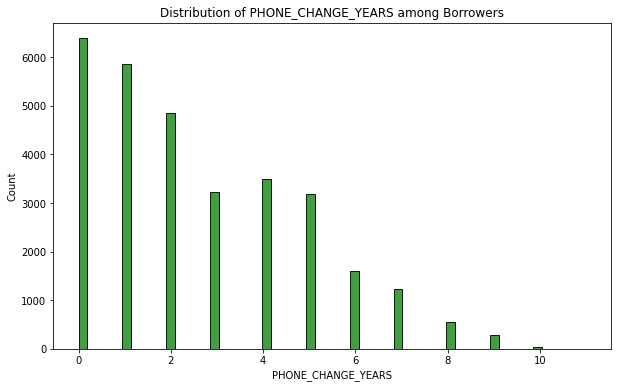

In [36]:
class_hist('PHONE_CHANGE_YEARS')

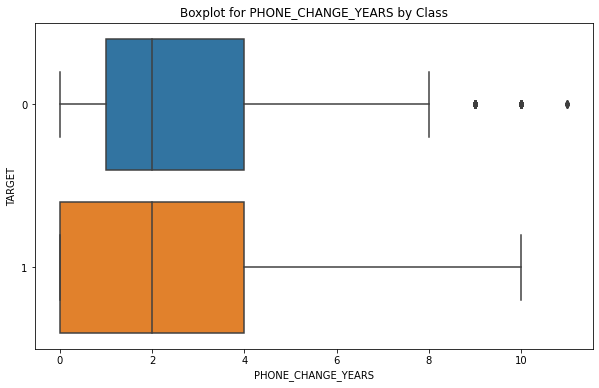

In [37]:
class_box('PHONE_CHANGE_YEARS')

It also appears that older borrowers are more likely to repay their loan. Although the median number of years is the same for both those who default and those eho do not, more people who recently changed their phone number do default.

#### Defaulted Borrowers

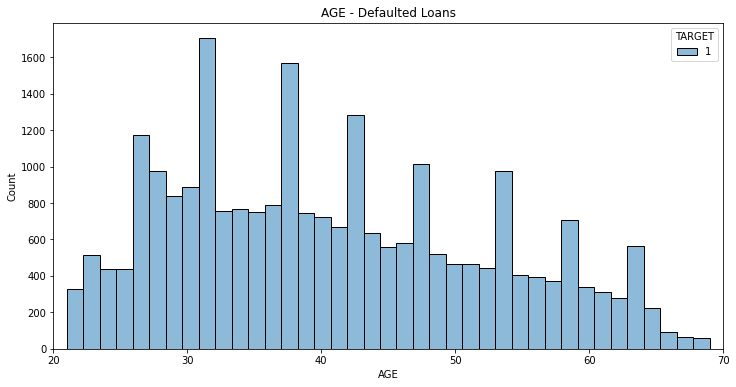

In [38]:
# Age
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data = train[train.TARGET == 1],x = 'AGE', 
             hue = 'TARGET').set_title('AGE - Defaulted Loans')

ax.set_xlim(20, 70)
plt.show()

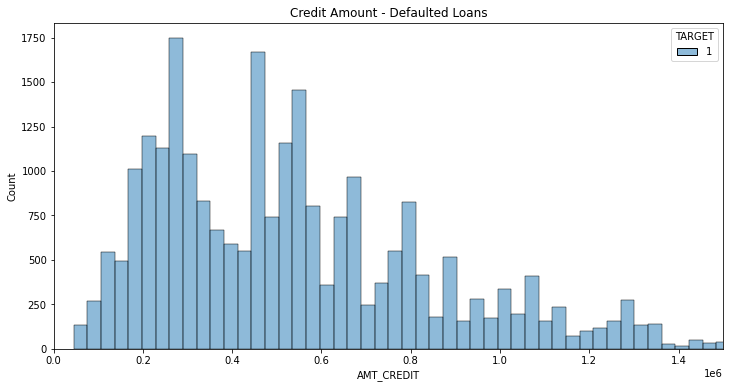

In [39]:
# Amount of Credit
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data = train[train.TARGET == 1],x = 'AMT_CREDIT', 
             hue = 'TARGET').set_title('Credit Amount - Defaulted Loans')

ax.set_xlim(0, 1500000)
plt.show()

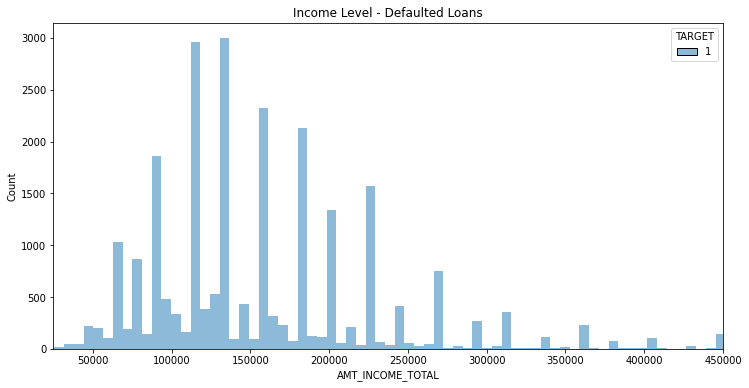

In [40]:
# Income
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data = train[train.TARGET == 1],
             x = 'AMT_INCOME_TOTAL', 
             hue = 'TARGET').set_title('Income Level - Defaulted Loans')


ax.set_xlim(25000, 450000)
plt.show()

From the above visualizations, the following assumptions can be made:
* younger borrowers are more likely to default than older borrowers.
* borrowers who have higher levels of credit are more likely to repay thier loan
* borrowers who have higher levels of income are more likely to repay thier loan

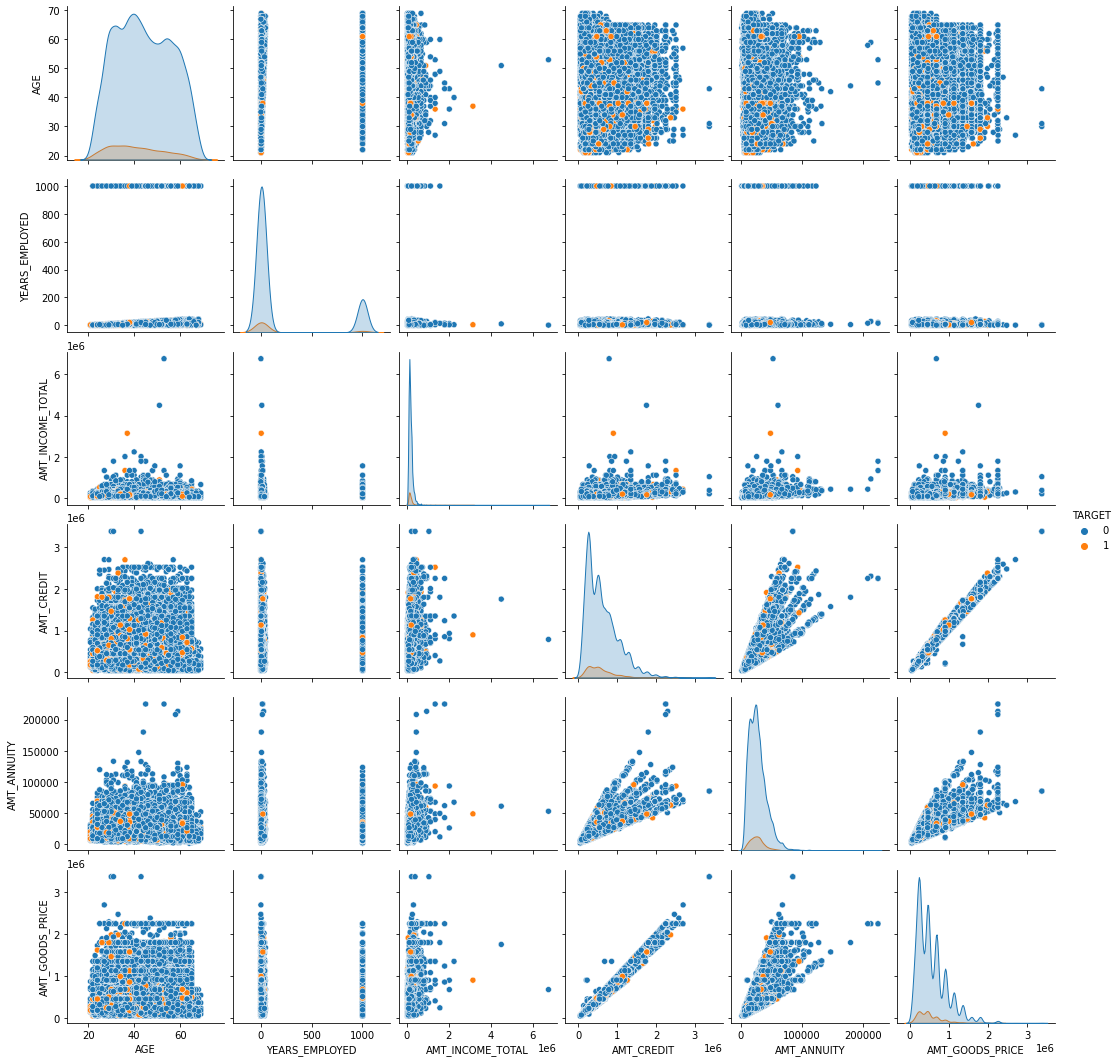

In [41]:
# Compare distribution of numeric features and target as well as the relationships between them
sns.pairplot(train30k[['TARGET','AGE','YEARS_EMPLOYED','AMT_INCOME_TOTAL',
                       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']], hue='TARGET')

YEARS_EMPLOYED has outliers that need to be addressed as it is not possible to have 1000 years of employment. AMT_TOTAL_INCOME and AMT_ANNUITY also have a handful of outliers that could skew model performance. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated which we will consider this when filling missing values.

# Feature Engineering
Based on the findings above, we chose to construct features to add predictive power to the dataset.

In [42]:
# Time employed to age 
# Length of employment compared to length of life
train['EA_RATIO'] = train['YEARS_EMPLOYED'] / train['AGE']

# Credit to income
# How much credit a person has compared to how much they earn in total
train['CI_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']

# Annuity to income
# How much of a person's income is in the form of an annuity
train['AI_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']

# Credit to annuity
# How much credit a person has compared to how much they earn through annuities
train['CA_RATIO'] = train['AMT_CREDIT'] / train['AMT_ANNUITY']

# Credit to cost of goods
# How much credit a person has compared to the price of goods for which the loan was given
train['CG_RATIO'] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']


# Log of important numeric features
# To limit influence of outliers
train['log_INCOME'] = np.log(train['AMT_INCOME_TOTAL'])                    
train['log_ANNUITY'] = np.log(train['AMT_ANNUITY'])                        
train['log_CREDIT'] = np.log(train['AMT_CREDIT'])                       
train['log_GOODS'] = np.log(train['AMT_GOODS_PRICE'])  

In [43]:
# Flag loans of higher amount than price of the item
train['FLAG_CG_ratio'] = train['AMT_CREDIT'] > train['AMT_GOODS_PRICE']  

# Flag IDs more than about 14 years old 
train['DAYS_ID_4200'] = train['DAYS_ID_PUBLISH'] < -4200       